<a href="https://colab.research.google.com/github/theekshana2000/Food-Calorie-Estimate-Using-Image-Processing/blob/main/calorie_estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/calories_estimation

/content/drive/MyDrive/calories_estimation


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
from tensorflow.keras.preprocessing import image
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

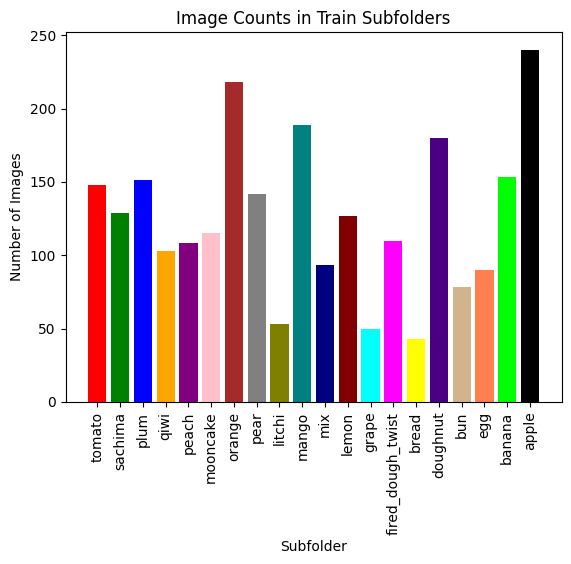

In [ ]:
# Define the path to the train folder
train_folder = 'JPEGImages/train'

# Get the list of subfolders in the train folder
subfolders = os.listdir(train_folder)

# Initialize an empty dictionary to store the counts of images in each subfolder
counts = {}

# Loop through each subfolder and count the number of images in it
for folder in subfolders:
    # Construct the path to the subfolder
    folder_path = os.path.join(train_folder, folder)
    # Count the number of images in the subfolder
    count = len(os.listdir(folder_path))
    # Store the count in the dictionary
    counts[folder] = count

# Define a list of colors to use for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy', 'maroon', 'cyan', 'magenta', 'yellow', 'indigo', 'tan', 'coral', 'lime', 'black']

# Plot the bar graph with the colors
plt.bar(range(len(counts)), list(counts.values()), align='center', color=colors)
plt.xticks(range(len(counts)), list(counts.keys()), rotation=90)
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Image Counts in Train Subfolders')
plt.show()

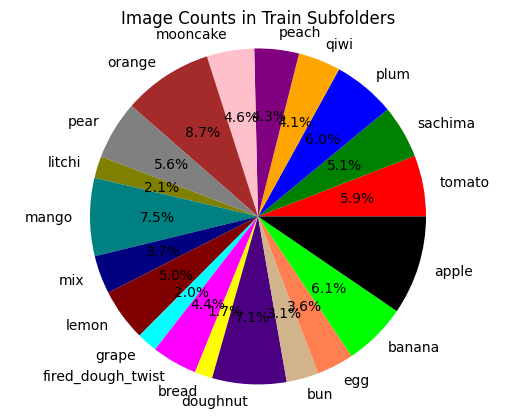

In [ ]:
# Define the path to the train folder
train_folder = 'JPEGImages/train'

# Get the list of subfolders in the train folder
subfolders = os.listdir(train_folder)

# Initialize an empty dictionary to store the counts of images in each subfolder
counts = {}

# Loop through each subfolder and count the number of images in it
for folder in subfolders:
    # Construct the path to the subfolder
    folder_path = os.path.join(train_folder, folder)
    # Count the number of images in the subfolder
    count = len(os.listdir(folder_path))
    # Store the count in the dictionary
    counts[folder] = count

# Define a list of colors to use for each wedge of the pie chart
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy', 'maroon', 'cyan', 'magenta', 'yellow', 'indigo', 'tan', 'coral', 'lime', 'black']

# Plot the pie chart with the counts and colors
plt.pie(list(counts.values()), labels=list(counts.keys()), colors=colors, autopct='%1.1f%%')
plt.title('Image Counts in Train Subfolders')
plt.axis('equal')
plt.show()

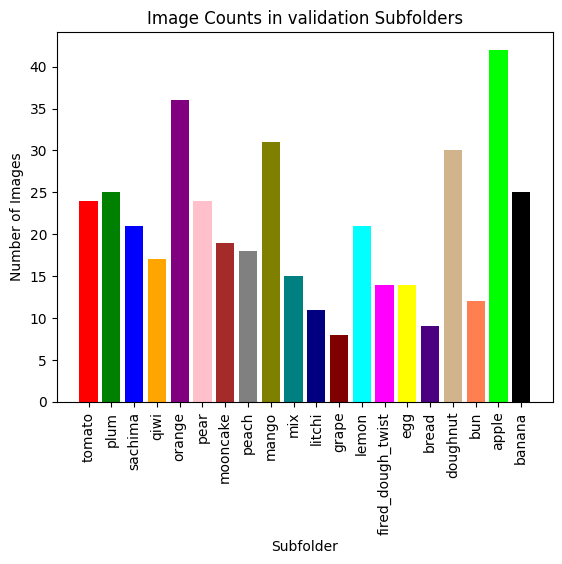

In [ ]:
# Define the path to the train folder
train_folder = 'JPEGImages/validation'

# Get the list of subfolders in the train folder
subfolders = os.listdir(train_folder)

# Initialize an empty dictionary to store the counts of images in each subfolder
counts = {}

# Loop through each subfolder and count the number of images in it
for folder in subfolders:
    # Construct the path to the subfolder
    folder_path = os.path.join(train_folder, folder)
    # Count the number of images in the subfolder
    count = len(os.listdir(folder_path))
    # Store the count in the dictionary
    counts[folder] = count

# Define a list of colors to use for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy', 'maroon', 'cyan', 'magenta', 'yellow', 'indigo', 'tan', 'coral', 'lime', 'black']

# Plot the bar graph with the colors
plt.bar(range(len(counts)), list(counts.values()), align='center', color=colors)
plt.xticks(range(len(counts)), list(counts.keys()), rotation=90)
plt.xlabel('Subfolder')
plt.ylabel('Number of Images')
plt.title('Image Counts in validation Subfolders')
plt.show()

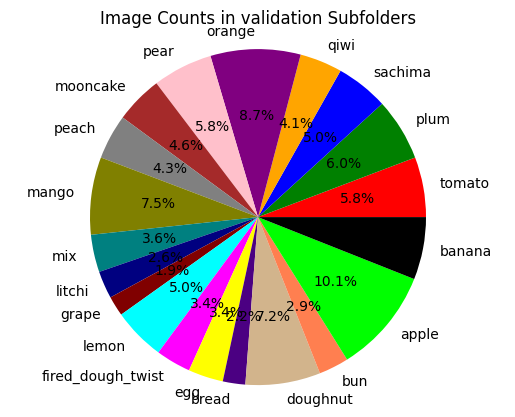

In [ ]:
# Define the path to the train folder
train_folder = 'JPEGImages/validation'

# Get the list of subfolders in the train folder
subfolders = os.listdir(train_folder)

# Initialize an empty dictionary to store the counts of images in each subfolder
counts = {}

# Loop through each subfolder and count the number of images in it
for folder in subfolders:
    # Construct the path to the subfolder
    folder_path = os.path.join(train_folder, folder)
    # Count the number of images in the subfolder
    count = len(os.listdir(folder_path))
    # Store the count in the dictionary
    counts[folder] = count

# Define a list of colors to use for each wedge of the pie chart
colors = ['red', 'green', 'blue', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'teal', 'navy', 'maroon', 'cyan', 'magenta', 'yellow', 'indigo', 'tan', 'coral', 'lime', 'black']

# Plot the pie chart with the counts and colors
plt.pie(list(counts.values()), labels=list(counts.keys()), colors=colors, autopct='%1.1f%%')
plt.title('Image Counts in validation Subfolders')
plt.axis('equal')
plt.show()

# Model Training Using CNN

In [ ]:
# Define the input image size and number of classes
img_width, img_height = 150, 150
num_classes = 20

# Define the data directories for training and validation
train_data_dir = 'JPEGImages/train'
validation_data_dir = 'JPEGImages/validation'

# Set up the data generators with data augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=32,
        class_mode='categorical')

Found 2520 images belonging to 20 classes.
Found 416 images belonging to 20 classes.


In [ ]:
# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with the data generators
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples/train_generator.batch_size,
                    epochs=100,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/100
78/78 [==============================] - 1711s 22s/step - loss: 2.9281 - accuracy: 0.1012 - val_loss: 2.7503 - val_accuracy: 0.1899
Epoch 2/100
78/78 [==============================] - 23s 293ms/step - loss: 2.4219 - accuracy: 0.2425 - val_loss: 2.0648 - val_accuracy: 0.3293
Epoch 3/100
78/78 [==============================] - 23s 293ms/step - loss: 2.0082 - accuracy: 0.3357 - val_loss: 1.6434 - val_accuracy: 0.4904
Epoch 4/100
78/78 [==============================] - 23s 292ms/step - loss: 1.6425 - accuracy: 0.4560 - val_loss: 1.3383 - val_accuracy: 0.5841
Epoch 5/100
78/78 [==============================] - 23s 291ms/step - loss: 1.3038 - accuracy: 0.5579 - val_loss: 0.9359 - val_accuracy: 0.7115
Epoch 6/100
78/78 [==============================] - 23s 293ms/step - loss: 1.0356 - accuracy: 0.6575 - val_loss: 0.7076 - val_accuracy: 0.7572
Epoch 7/100
78/78 [==============================] - 23s 297ms/step - loss: 0.8092 - accuracy: 0.7222 - val_loss: 0.5536 - val_accuracy:

In [ ]:
 # Save the model
model.save('food_classify.h5')

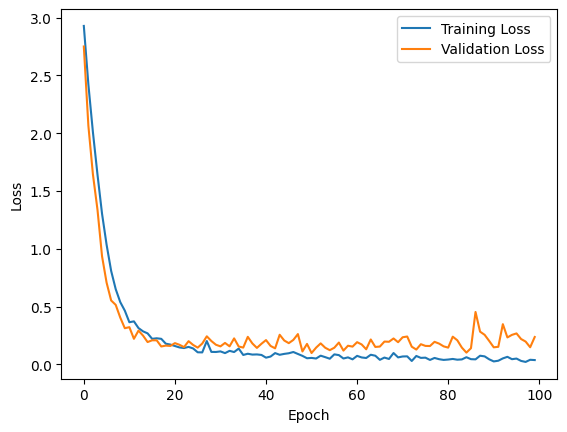

In [ ]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

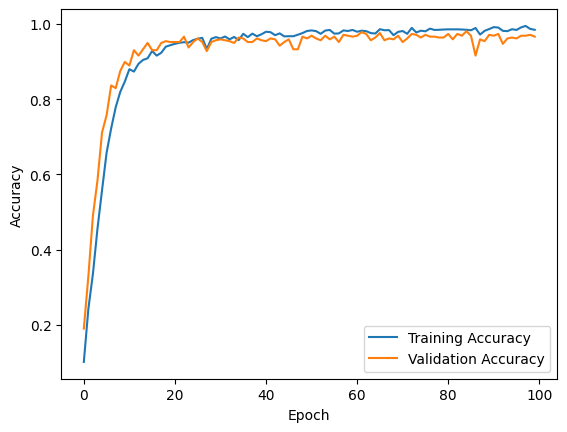

In [ ]:
# plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification Report

In [ ]:
# Define a list of class names
class_names = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist', 'grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach', 'pear', 'plum', 'qiwi', 'sachima', 'tomato']



In [ ]:
path = 'JPEGImages/validation'

actual_label = []
pred_label = []

for folder in os.listdir(path):
  folder_path = os.path.join(path, folder)
  for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    # actual_label.append(class_names.index(folder))
    actual_label.append(folder)

    img = image.load_img(file_path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    probs = model.predict(x)
    predicted_class = np.argmax(probs)

    # pred_label.append(predicted_class)
    class_name = class_names[predicted_class]
    pred_label.append(class_name)

1/1 [==============================] - 0s 18ms/step


                   precision    recall  f1-score   support

            apple       1.00      0.95      0.98        42
           banana       0.86      0.96      0.91        25
            bread       1.00      0.89      0.94         9
              bun       1.00      1.00      1.00        12
         doughnut       0.97      0.97      0.97        30
              egg       1.00      1.00      1.00        14
fired_dough_twist       1.00      1.00      1.00        14
            grape       0.80      1.00      0.89         8
            lemon       1.00      0.95      0.98        21
           litchi       1.00      1.00      1.00        11
            mango       0.89      1.00      0.94        31
              mix       0.92      0.80      0.86        15
         mooncake       1.00      1.00      1.00        19
           orange       0.97      0.92      0.94        36
            peach       1.00      0.94      0.97        18
             pear       1.00      0.96      0.98       

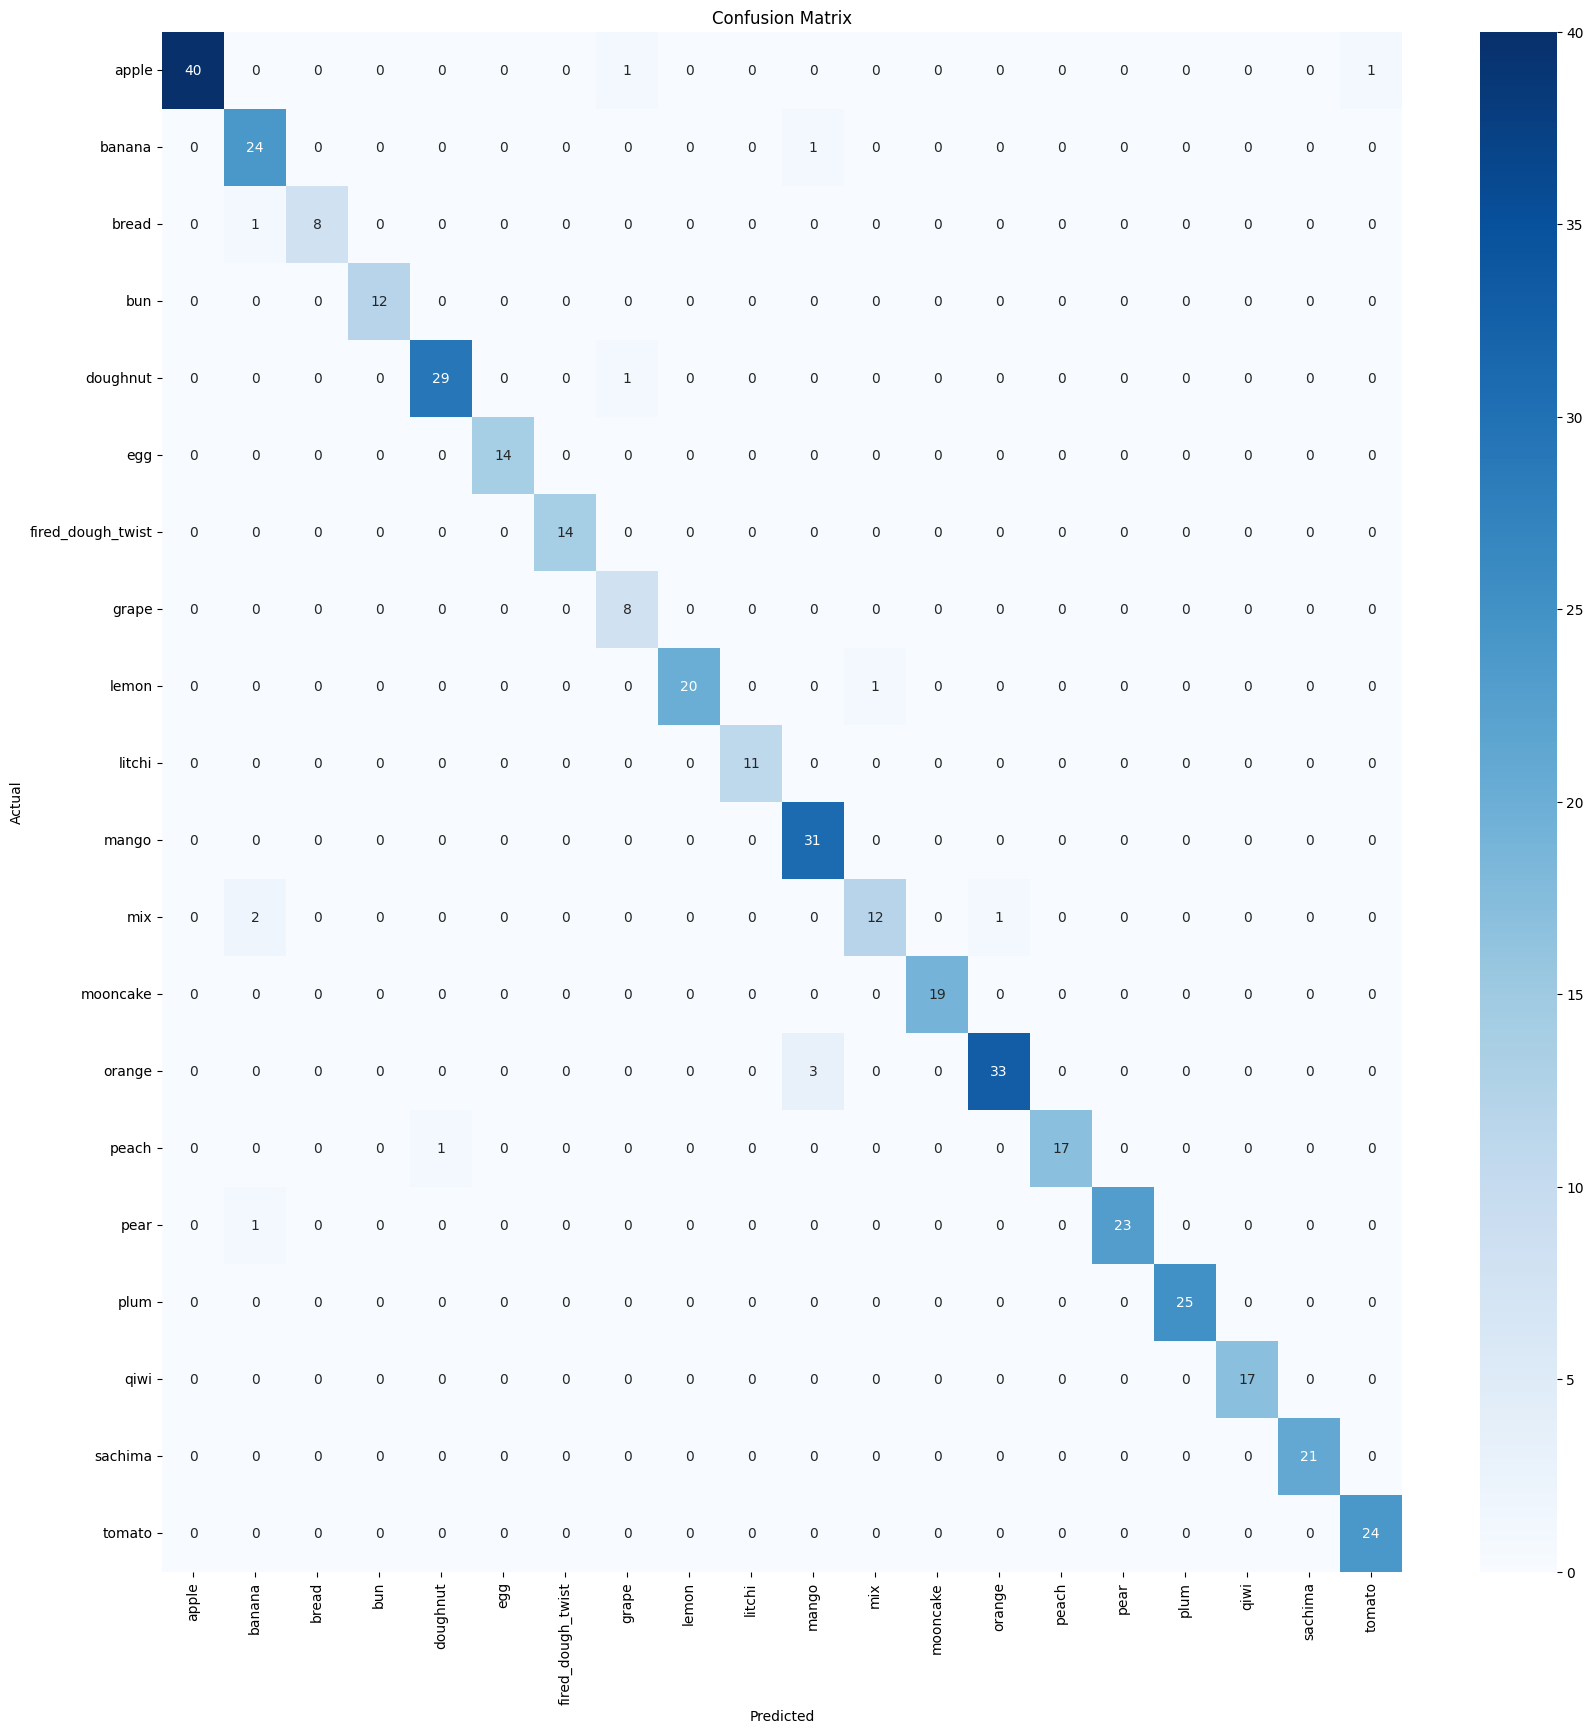

In [ ]:
 # Assuming actual_label and pred_label are already defined

# Convert class labels to strings if they are integers
label_encoder = LabelEncoder()
actual_label_encoded = label_encoder.fit_transform(actual_label)
pred_label_encoded = label_encoder.transform(pred_label)

# Invert the label encoding to get the original class names
class_names_encoded = label_encoder.classes_

# Print the classification report
print(classification_report(actual_label_encoded, pred_label_encoded, target_names=class_names_encoded))

# Generate confusion matrix
cm = confusion_matrix(actual_label_encoded, pred_label_encoded)

# Plot confusion matrix heatmap
plt.figure(figsize=(len(class_names_encoded), len(class_names_encoded)))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_encoded, yticklabels=class_names_encoded)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



1/1 [==============================] - 0s 18ms/step
                   precision    recall  f1-score   support

            apple       1.00      1.00      1.00       240
           banana       1.00      1.00      1.00       153
            bread       1.00      1.00      1.00        43
              bun       1.00      1.00      1.00        78
         doughnut       1.00      1.00      1.00       180
              egg       1.00      1.00      1.00        90
fired_dough_twist       1.00      1.00      1.00       110
            grape       1.00      1.00      1.00        50
            lemon       1.00      1.00      1.00       127
           litchi       1.00      1.00      1.00        53
            mango       1.00      1.00      1.00       189
              mix       1.00      1.00      1.00        93
         mooncake       1.00      1.00      1.00       115
           orange       1.00      1.00      1.00       218
            peach       1.00      1.00      1.00       108
   

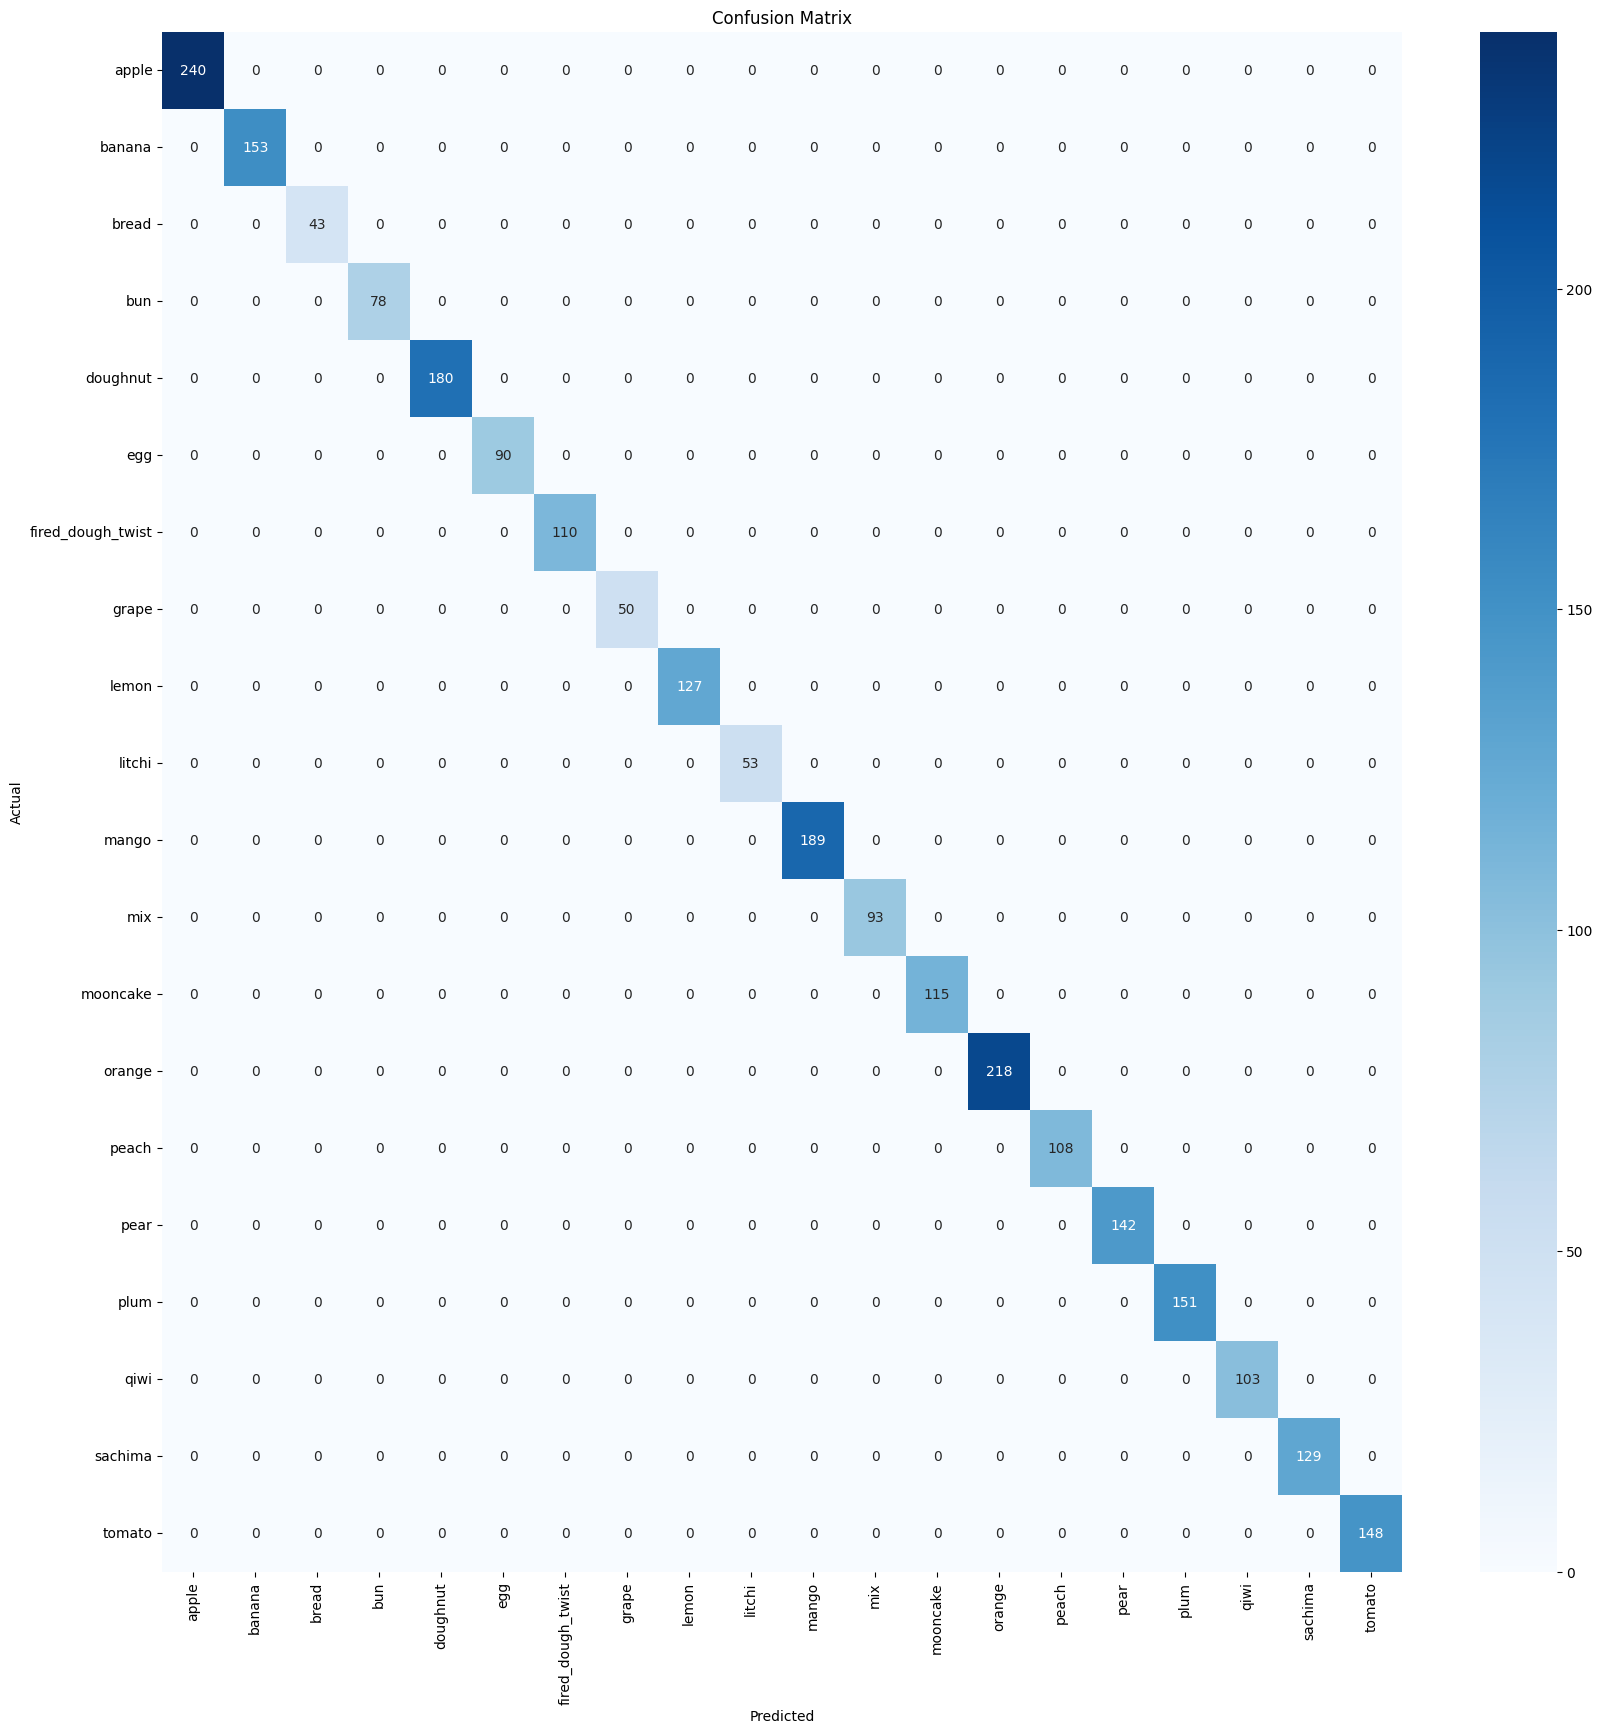

In [ ]:
path = 'JPEGImages/train'

actual_label = []
pred_label = []

for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        actual_label.append(folder)

        img = image.load_img(file_path, target_size=(150, 150))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255.0

        probs = model.predict(x)
        predicted_class = np.argmax(probs)

        class_name = class_names[predicted_class]
        pred_label.append(class_name)

# Convert class labels to strings if they are integers
label_encoder = LabelEncoder()
actual_label_encoded = label_encoder.fit_transform(actual_label)
pred_label_encoded = label_encoder.transform(pred_label)

# Invert the label encoding to get the original class names
class_names_encoded = label_encoder.classes_

# Print the classification report
print(classification_report(actual_label_encoded, pred_label_encoded, target_names=class_names_encoded))

# Generate confusion matrix
cm = confusion_matrix(actual_label_encoded, pred_label_encoded)

# Plot confusion matrix heatmap
plt.figure(figsize=(len(class_names_encoded), len(class_names_encoded)))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names_encoded, yticklabels=class_names_encoded)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




#  Support Vector Machine



In [ ]:
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist','grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach','pear', 'plum', 'qiwi', 'sachima', 'tomato']
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
train_dir = os.path.join(datadir, 'train')
val_dir = os.path.join(datadir, 'validation')
flat_data_arr = []
target_arr = []

In [ ]:
# Load training data
for i, category in enumerate(Categories):
    print(f'Loading training images for category: {category}')
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(i)
    print(f'Loaded training images for category: {category} successfully')

Loading training images for category: apple
Loaded training images for category: apple successfully
Loading training images for category: banana
Loaded training images for category: banana successfully
Loading training images for category: bread
Loaded training images for category: bread successfully
Loading training images for category: bun
Loaded training images for category: bun successfully
Loading training images for category: doughnut
Loaded training images for category: doughnut successfully
Loading training images for category: egg
Loaded training images for category: egg successfully
Loading training images for category: fired_dough_twist
Loaded training images for category: fired_dough_twist successfully
Loading training images for category: grape
Loaded training images for category: grape successfully
Loading training images for category: lemon
Loaded training images for category: lemon successfully
Loading training images for category: litchi
Loaded training images for cate

In [ ]:
# Load validation data
for i, category in enumerate(Categories):
    print(f'Loading validation images for category: {category}')
    path = os.path.join(val_dir, category)
    for img in os.listdir(path):
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(i)
    print(f'Loaded validation images for category: {category} successfully')

Loading validation images for category: apple
Loaded validation images for category: apple successfully
Loading validation images for category: banana
Loaded validation images for category: banana successfully
Loading validation images for category: bread
Loaded validation images for category: bread successfully
Loading validation images for category: bun
Loaded validation images for category: bun successfully
Loading validation images for category: doughnut
Loaded validation images for category: doughnut successfully
Loading validation images for category: egg
Loaded validation images for category: egg successfully
Loading validation images for category: fired_dough_twist
Loaded validation images for category: fired_dough_twist successfully
Loading validation images for category: grape
Loaded validation images for category: grape successfully
Loading validation images for category: lemon
Loaded validation images for category: lemon successfully
Loading validation images for category: 

In [ ]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

In [ ]:
df = pd.DataFrame(flat_data)
df['Target'] = target


In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train the SVM model with L2 regularization
svm = SVC(C=0.01, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=0.01, kernel='linear')

In [ ]:
# Test the model on training data
y_train_pred = svm.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
# Test the model on validation data
y_val_pred = svm.predict(x_test)
val_accuracy = accuracy_score(y_test, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7551020408163265


In [ ]:
# Create an SVM classifier
svm = SVC(C=0.01, kernel='linear')

# Perform cross-validation
scores = cross_val_score(svm, x_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.79787234 0.80638298 0.80212766 0.78678038 0.76119403]
Mean Accuracy: 0.7908714784738919


In [ ]:


# Assume flat_data_arr and target_arr are your feature and target arrays for image classification

# Create DataFrame
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)
df = pd.DataFrame(flat_data)
df['Target'] = target

# Split the data into features and target
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'degree': [1, 2, 3],
    'gamma': ['scale', 'auto'],
    'shrinking': [False, True],
    'probability': [False, True],
    'decision_function_shape': ['ovo', 'ovr'],
    'random_state': [1, 42],
}

svm = SVC()
gsc = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, cv=5, verbose=1, n_jobs=1, n_iter=10)
grid_result = gsc.fit(x_train, y_train)
best_params = grid_result.best_params_

# Train the SVM model with the best hyperparameters
best_svm = SVC(
    C=best_params["C"],
    kernel=best_params["kernel"],
    degree=best_params["degree"],
    gamma=best_params["gamma"],
    shrinking=best_params["shrinking"],
    probability=best_params["probability"],
    decision_function_shape=best_params["decision_function_shape"],
    random_state=best_params["random_state"]
)
best_svm.fit(x_train, y_train)

# Evaluate the model on the testing set
accuracy = best_svm.score(x_test, y_test)
print(f'Testing Accuracy: {accuracy}')


# RandomForestClassifier

In [ ]:
# Define the parameter grid
param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [None, 5, 10]}

In [ ]:
# Train the model
rf = RandomForestClassifier()
model = GridSearchCV(rf, param_grid)
model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
# Parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample'],
    'random_state': [1, 7, 10, 42]
}

# Create a RandomForestClassifier
rf = RandomForestClassifier()

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid,
                                   n_iter=100, cv=5, verbose=2, random_state=42,
                                   n_jobs=-1, scoring='accuracy')

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Best model
best_rf = random_search.best_estimator_
print("Best Random Forest Model:", best_rf)

In [ ]:
# Test the model on validation data
y_val_pred = model.predict(x_test)
val_accuracy = accuracy_score(y_test, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.7891156462585034


In [ ]:
# Test the model on training data
y_train_pred = model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
print(classification_report(y_test,y_val_pred , target_names=Categories))

                   precision    recall  f1-score   support

            apple       0.83      0.74      0.78        61
           banana       0.54      0.49      0.51        39
            bread       0.75      0.43      0.55        14
              bun       0.95      0.91      0.93        22
         doughnut       0.76      0.78      0.77        40
              egg       0.94      0.94      0.94        18
fired_dough_twist       0.94      0.59      0.72        29
            grape       1.00      1.00      1.00         9
            lemon       0.83      1.00      0.91        20
           litchi       1.00      1.00      1.00        14
            mango       0.65      0.77      0.71        39
              mix       0.82      0.58      0.68        24
         mooncake       0.70      0.88      0.78        26
           orange       0.80      0.83      0.81        53
            peach       0.76      0.62      0.68        26
             pear       0.88      0.85      0.87       

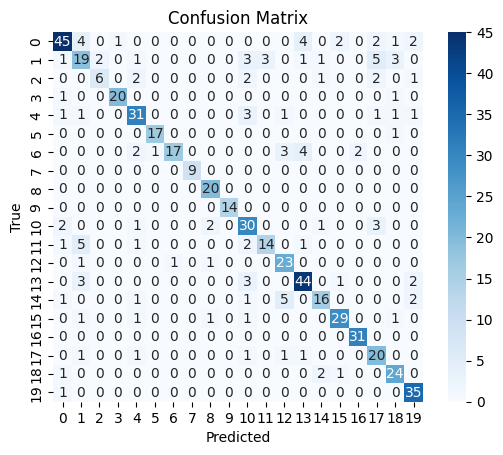

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_val_pred)
# Create a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", square=True)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [ ]:
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist','grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach','pear', 'plum', 'qiwi', 'sachima', 'tomato']
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
train_dir = os.path.join(datadir, 'train')
val_dir = os.path.join(datadir, 'validation')
batch_size = 32


In [ ]:
flat_data_arr = []
target_arr = []

In [ ]:
# Load training and validation data
for i, category in enumerate(Categories):
    for dir in [train_dir, val_dir]:
        print(f'Loading images from {dir} for category: {category}')
        path = os.path.join(dir, category)
        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (150, 150, 3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(i)
        print(f'Loaded images from {dir} for category: {category} successfully')

Loading images from /content/drive/MyDrive/calories_estimation/JPEGImages/train for category: apple
Loaded images from /content/drive/MyDrive/calories_estimation/JPEGImages/train for category: apple successfully
Loading images from /content/drive/MyDrive/calories_estimation/JPEGImages/validation for category: apple
Loaded images from /content/drive/MyDrive/calories_estimation/JPEGImages/validation for category: apple successfully
Loading images from /content/drive/MyDrive/calories_estimation/JPEGImages/train for category: banana
Loaded images from /content/drive/MyDrive/calories_estimation/JPEGImages/train for category: banana successfully
Loading images from /content/drive/MyDrive/calories_estimation/JPEGImages/validation for category: banana
Loaded images from /content/drive/MyDrive/calories_estimation/JPEGImages/validation for category: banana successfully
Loading images from /content/drive/MyDrive/calories_estimation/JPEGImages/train for category: bread
Loaded images from /content/

In [ ]:
flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

In [ ]:
# Reduce dimensionality with PCA
pca = PCA(n_components=100)
flat_data_pca = pca.fit_transform(flat_data)

In [ ]:
df = pd.DataFrame(flat_data_pca)
df['Target'] = target

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
 #Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Train the XGBoost model with early stopping
xgb = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1,
                    colsample_bytree=0.7, gamma=0.1, min_child_weight=3,
                    eval_metric='mlogloss')

xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Test the model on training data
y_train_pred = xgb.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 1.0


In [ ]:
# Test the model on validation data
y_test_pred = xgb.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Validation Accuracy:", test_accuracy)

Validation Accuracy: 0.6615646258503401


In [ ]:
# Variables
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist','grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach','pear', 'plum', 'qiwi', 'sachima', 'tomato']
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
train_dir = os.path.join(datadir, 'train')
batch_size = 32
train_sample_count =2520

In [ ]:
# Pretrained model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
# Image augmentation
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load images from directories and apply augmentation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2520 images belonging to 20 classes.


In [ ]:
# Extract features
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count, len(Categories)))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(preprocess_input(inputs_batch))
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return np.reshape(features, (sample_count, -1)), labels


In [ ]:
# Extract features using pretrained model
x_train, y_train = extract_features(train_generator, train_sample_count)

1/1 [==============================] - 2s 2s/step


In [ ]:
# Convert y_train to 1D array
y_train = np.argmax(y_train, axis=1)
# Convert y_val to 1D array
y_val = np.argmax(y_val, axis=1)

In [ ]:
  # Variables
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist','grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach','pear', 'plum', 'qiwi', 'sachima', 'tomato']
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
val_dir = os.path.join(datadir, 'validation')
batch_size = 32
train_sample_count =416

In [ ]:
 # Pretrained model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [ ]:
# Image augmentation for validation set
val_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load images from validation directoryand apply augmentation
val_generator = ImageDataGenerator().flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 416 images belonging to 20 classes.


In [ ]:
# Count the total number of validation samples
val_sample_count = 0
for category in Categories:
    path = os.path.join(val_dir, category)
    val_sample_count += len(os.listdir(path))

In [ ]:
# Extract features from the validation set using the pretrained model
x_val, y_val = extract_features(val_generator, val_sample_count)

1/1 [==============================] - 0s 24ms/step


In [ ]:
#Train XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on validation set and calculate accuracy
y_val_pred = xgb.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8317307692307693


# Decision tree


In [ ]:
# Load VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

def extract_features(directory, categories):
    features = []
    labels = []

    for category in categories:
        path = os.path.join(directory, category)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image)

            feature = model.predict(image)
            features.append(feature.flatten())
            labels.append(category)

    return np.array(features), np.array(labels)


In [ ]:
# Extract features
train_features, train_labels = extract_features(train_dir, Categories)
val_features, val_labels = extract_features(val_dir, Categories)

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Train Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(train_features, train_labels)

DecisionTreeClassifier()

In [ ]:
# Predictions
predictions = dtree.predict(val_features)


In [ ]:
# Evaluation
print(classification_report(val_labels, predictions))
print("Accuracy:", accuracy_score(val_labels, predictions))

                   precision    recall  f1-score   support

            apple       0.68      0.67      0.67        42
           banana       0.86      0.76      0.81        25
            bread       0.71      0.56      0.63         9
              bun       0.78      0.58      0.67        12
         doughnut       0.69      0.73      0.71        30
              egg       0.80      0.86      0.83        14
fired_dough_twist       0.65      0.79      0.71        14
            grape       1.00      0.75      0.86         8
            lemon       0.71      0.81      0.76        21
           litchi       0.82      0.82      0.82        11
            mango       0.59      0.77      0.67        31
              mix       0.42      0.67      0.51        15
         mooncake       0.74      0.74      0.74        19
           orange       0.92      0.67      0.77        36
            peach       0.53      0.44      0.48        18
             pear       0.64      0.67      0.65       

In [ ]:
# Path to your dataset
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
train_dir = os.path.join(datadir, 'train')
val_dir = os.path.join(datadir, 'validation')


In [ ]:
# Categories
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist',
              'grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach',
              'pear', 'plum', 'qiwi', 'sachima', 'tomato']

In [ ]:
# Load VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

def extract_features(directory, categories):
    features = []
    labels = []

    for category in categories:
        path = os.path.join(directory, category)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image)

            feature = model.predict(image)
            features.append(feature.flatten())
            labels.append(category)

    return np.array(features), np.array(labels)

In [ ]:
# Extract features
train_features, train_labels = extract_features(train_dir, Categories)
val_features, val_labels = extract_features(val_dir, Categories)

1/1 [==============================] - 0s 17ms/step


In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(np.vstack((train_features, val_features)),
                                                    np.concatenate((train_labels, val_labels)),
                                                    test_size=0.2, random_state=42)

In [ ]:
# Define the Decision Tree Classifier
tree = DecisionTreeClassifier()


In [ ]:
# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 15, 20],  # Adjusted depth values
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],  # Added more options for min_samples_leaf
    'max_features': ['auto', 'sqrt', 'log2']  # Added 'log2' option
}


In [ ]:
# Perform grid search using cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [ ]:
# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


Best Parameters:
criterion: gini
max_depth: 20
max_features: sqrt
min_samples_leaf: 4
min_samples_split: 2
splitter: best


In [ ]:
# Test the model on training and test data
y_train_pred = best_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8062180579216355


In [ ]:
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5493197278911565


In [ ]:
# Additional performance evaluation
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
                    precision    recall  f1-score   support

            apple       0.61      0.54      0.57        61
           banana       0.67      0.67      0.67        39
            bread       0.56      0.36      0.43        14
              bun       0.33      0.36      0.35        22
         doughnut       0.65      0.65      0.65        40
              egg       0.60      0.67      0.63        18
fired_dough_twist       0.73      0.55      0.63        29
            grape       1.00      0.56      0.71         9
            lemon       0.45      0.65      0.53        20
           litchi       1.00      0.64      0.78        14
            mango       0.49      0.54      0.51        39
              mix       0.30      0.29      0.30        24
         mooncake       0.44      0.42      0.43        26
           orange       0.68      0.68      0.68        53
            peach       0.50      0.31      0.38        26
             pear       0.60   

# KNN

In [ ]:
# Load VGG16 model for feature extraction
model = VGG16(weights='imagenet', include_top=False)

def extract_features(directory, categories):
    features = []
    labels = []

    for category in categories:
        path = os.path.join(directory, category)

        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
            image = preprocess_input(image)

            feature = model.predict(image)
            features.append(feature.flatten())
            labels.append(category)

    return np.array(features), np.array(labels)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Path to your dataset
datadir = '/content/drive/MyDrive/calories_estimation/JPEGImages'
train_dir = os.path.join(datadir, 'train')
val_dir = os.path.join(datadir, 'validation')

In [ ]:
# Categories
Categories = ['apple', 'banana', 'bread', 'bun', 'doughnut', 'egg', 'fired_dough_twist',
              'grape', 'lemon', 'litchi', 'mango', 'mix', 'mooncake', 'orange', 'peach',
              'pear', 'plum', 'qiwi', 'sachima', 'tomato']

In [ ]:
# Extract features
train_features, train_labels = extract_features(train_dir, Categories)
val_features, val_labels = extract_features(val_dir, Categories)

1/1 [==============================] - 0s 18ms/step


In [ ]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(np.vstack((train_features, val_features)),np.concatenate((train_labels, val_labels)),test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier()


In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example: trying different values for n_neighbors
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [ ]:
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [3, 5, 7, 9],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Best Parameters:
algorithm: auto
leaf_size: 20
n_neighbors: 3
p: 2
weights: distance


In [ ]:
# Test the model on training and test data
y_train_pred = best_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 1.0


In [ ]:
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9404761904761905


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
                    precision    recall  f1-score   support

            apple       0.94      0.97      0.95        61
           banana       0.94      0.87      0.91        39
            bread       1.00      1.00      1.00        14
              bun       0.84      0.95      0.89        22
         doughnut       0.97      0.97      0.97        40
              egg       0.95      1.00      0.97        18
fired_dough_twist       1.00      0.97      0.98        29
            grape       1.00      1.00      1.00         9
            lemon       0.91      1.00      0.95        20
           litchi       1.00      1.00      1.00        14
            mango       0.88      0.97      0.93        39
              mix       0.94      0.67      0.78        24
         mooncake       0.90      1.00      0.95        26
           orange       0.96      0.91      0.93        53
            peach       1.00      0.81      0.89        26
             pear       0.91   

# Naive Bayes

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Variation smoothing parameter
}

In [ ]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=nb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]})

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
# Create a Gaussian Naive Bayes classifier with the best hyperparameters
best_nb_classifier = GaussianNB(var_smoothing=best_params['var_smoothing'])


In [ ]:
# Train the classifier on the training data
best_nb_classifier.fit(x_train, y_train)


GaussianNB(var_smoothing=1e-05)

In [ ]:
# Predict the labels of the test set
y_pred = best_nb_classifier.predict(x_test)


In [ ]:
# Test the model on training and test data
y_train_pred = best_nb_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9846678023850085


In [ ]:
y_test_pred =best_nb_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8639455782312925


# Ada Boost

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of weak learners (decision trees)
    'learning_rate': [0.1, 0.5, 1.0],  # Weight of each weak learner
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm to use for updating the weights
}

In [ ]:
# Create an AdaBoost classifier
ada_classifier = AdaBoostClassifier()

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]})

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_


In [ ]:
# Create an AdaBoost classifier with the best hyperparameters
best_ada_classifier = AdaBoostClassifier(**best_params)

In [ ]:
# Train the classifier on the training data
best_ada_classifier.fit(x_train, y_train)


AdaBoostClassifier(algorithm='SAMME', n_estimators=150)

In [ ]:
# Predict the labels of the test set
y_pred = best_ada_classifier.predict(x_test)

In [ ]:
# Test the model on training and test data
y_train_pred = best_ada_classifier.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.5783645655877342


In [ ]:
y_test_pred =best_ada_classifier.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5221088435374149


In [ ]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Classification Report:
                    precision    recall  f1-score   support

            apple       0.48      0.51      0.50        61
           banana       0.96      0.64      0.77        39
            bread       0.75      0.21      0.33        14
              bun       0.67      0.09      0.16        22
         doughnut       0.73      0.47      0.58        40
              egg       1.00      0.33      0.50        18
fired_dough_twist       1.00      0.55      0.71        29
            grape       1.00      0.44      0.62         9
            lemon       0.75      0.60      0.67        20
           litchi       1.00      0.79      0.88        14
            mango       0.47      0.62      0.53        39
              mix       0.29      0.29      0.29        24
         mooncake       0.21      0.27      0.24        26
           orange       0.54      0.83      0.65        53
            peach       0.31      0.38      0.34        26
             pear       0.19   

# Gradient Boosting Machines (GBM)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.1, 0.5, 1.0],  # Weight of each weak learner
    'max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.5, 0.8, 1.0],  # Fraction of samples used for fitting the individual base learners
}

In [ ]:
# Create a Gradient Boosting classifier
gbm_classifier = GradientBoostingClassifier()


In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)


In [ ]:
# Get the best parameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")


In [ ]:
# Test the model on training and test data
y_train_pred =  best_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

In [ ]:
y_test_pred =  best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_test_pred))